In [1]:
from datascience import *
from prob140 import *
from sympy import *
init_printing()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import prob140
prob140.__version__

'0.2.8.0'

# Declaring Variables

Variables are used for constants and variables. The syntax to declare variables is

`declare('x','y')`

This creates two variables `x` and `y` in your global namespace which you can now use as you'd like

If you'd like to restrict the variables to specific domains, we support native Sympy syntax

`declare('x',positive=True)` $(0,\infty)$

`declare('x',negative=True)` $(-\infty,0)$

`declare('x',integer=True)` $\mathbb{Z}$

The above restrictions are to help simplify sums and integrals through Sympy (and to avoid odd edge cases)

In [3]:
declare('x','y')
x,y

## Writing Expressions

We combine variables to create *expressions*. To do so, we can perform arithmetic operations and also apply functions. Here are some of the common functions

`exp(x)`: $e^x$

`sqrt(x)`: $\sqrt{x}$

`pow(x,y)`: $x^y$ (you can use `x**y` but this is cleaner)

In [4]:
declare('x','y')
x+y,x-y, x - 1, exp(x*2),y - exp(x*2)

## Derivatives and Integrals

The process of calculating derivatives and integrals are two fold:

First, you setup the derivative/integral, and then you actually compute it.

To set up a derivative:

`Derivative(x**2)`

If you have multiple variables, and would like to specify which variable to differentiate over, then send the variable as the second argument. E.G.

`Derivative(x*y,x)`

This creates a derivative expression; to actually evaluate and simplify it, add the `doit()` method.

`Derivative(x**2).doit()`

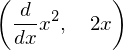

In [5]:
Derivative(x**2), Derivative(x**2).doit()

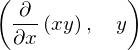

In [6]:
Derivative(x*y,x), Derivative(x*y,x).doit()

### Integrals

The syntax for computing an integral is the following: 

If you'd like to compute an indefinite integral, then the syntax is similar to the derivative

`Integral(<expr>)`, or specifying the variable of integration, `Integral(<expr>,<variable>)`

Again, `.doit()` evaluates

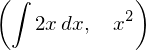

In [7]:
Integral(2*x),Integral(2*x).doit()

For definite integrals, the form goes

`Integral(<expr>, (<variable>,<start>,<end>))`

As an example:

`Integral(2*x,(x,1,2))`

Again, `.doit()` evaluates

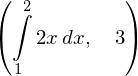

In [8]:
Integral(2*x,(x,1,2)),Integral(2*x,(x,1,2)).doit()

### Simplifying Expressions

`factor(<expr>)` attempts to factor the expression as best possible
`simplify(<expr>)` attempts to simplify the expression as best possible

Since most results by default from SymPy are ugly, we've created a convenience function
`nicefy(<expr>)` which does both at the same time (`factor(simplify(<expr>))`)

** Note: Don't always use nicefy: the original expression is sometimes better than the nicefied one; also be comfortable using factor and simplify by themselves, since they may give better results**

In [9]:
declare('x')
x**2 + 2*x + 1, nicefy(x**2 + 2*x + 1)

NameError: name 'nicefy' is not defined

## Plotting

Use `Plot_continuous`

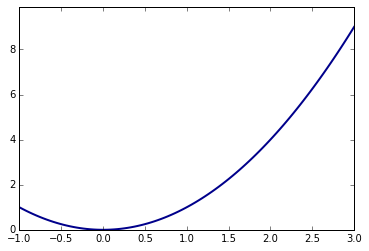

In [10]:
declare('x')
Plot_continuous((-1,3), x**2)

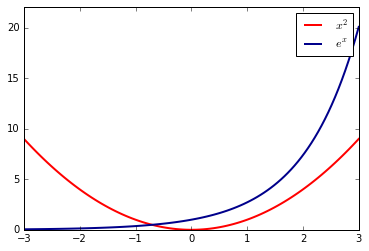

In [11]:
# A little more complicated (you can pass in matplotlib arguments)
Plot_continuous((-3,3),x**2,color='r',label='$x^2$')
Plot_continuous((-3,3),exp(x),label='$e^x$')
plt.legend()

## Substituting in Numbers for variables

Especially when working with probabilities, you may want to work with parameters as variables; however when plotting, you'll need to escape out the parameters with actual values; uses `.subs` for this

`(x**2).subs(x,2)` will return $2^2$

In [ ]:
declare('x','y')
(x**y).subs(x,2)

# Some Actual Probability

The next section will just be computing $EX$, $Var(X)$, and the CDF of $X$ of some common variables for practice with SymPy

In [ ]:
# The Uniform Distribution on [a,b]
declare('x','a','b','y')
pdf = 1 / (b-a)
cdf = Integral(pdf,(x,a,y)).doit()
nicefy(cdf)

In [ ]:
EX = Integral(x*pdf, (x,a,b)).doit()
Var = Integral((x-EX)**2*pdf, (x,a,b)).doit()
nicefy(EX),nicefy(Var)

In [ ]:
a_actual = 0
b_actual = 10
pdf_actual = pdf.subs(a,a_actual).subs(b,b_actual)
Plot_continuous((a_actual,b_actual),pdf_actual)

In [ ]:
# The Exponential Distribution w/ param l
declare('x','l','y')
pdf = l*exp(-1*l*x)
cdf = Integral(pdf,(x,0,y)).doit()
cdf

In [ ]:
EX = Integral(x*pdf, (x,0,oo)).doit()
Var = Integral((x-EX)**2*pdf, (x,0,oo)).doit()
nicefy(EX),nicefy(Var)

Wow that looks horrible! This is because we didn't account for the fact that $l$ must be positive; doing it again

In [ ]:
# The Exponential Distribution w/ param l
declare('x','l','y',positive=True)
pdf = l*exp(-1*l*x)
EX = Integral(x*pdf, (x,0,oo)).doit()
Var = Integral((x-EX)**2*pdf, (x,0,oo)).doit()
nicefy(EX),nicefy(Var)

In [ ]:
l1 = 1
l2 = 2
pdf_actual_1 = pdf.subs(l,l1)
pdf_actual_2 = pdf.subs(l,l2)

Plot_continuous((0,2),pdf_actual_1,color='r',label='$\lambda=1$')
Plot_continuous((0,2),pdf_actual_2,color='b',label='$\lambda=2$')
plt.legend();

In [ ]:
# Change of variable into $Z = 10x$ (or in other words $x = 1/10 z$)
declare('z')
pdf.subs(x,z/10)*Derivative(x/10).doit()

In [ ]:
# The normal distribution w/ param mu, sigma
# The Exponential Distribution w/ param l
declare('x','mu')
declare('sigma',positive=True)
pdf = 1 / (sqrt(2*pi)*sigma) * exp(-1*(x-mu)**2/(2*sigma**2))
pdf

In [ ]:
EX = Integral(x*pdf, (x,-oo,oo)).doit()
Var = Integral((x-EX)**2*pdf, (x,-oo,oo)).doit()
nicefy(EX),nicefy(Var)

In [ ]:
# Change of variable into $Z = 10x$ (or in other words $x = 1/10 z$)
declare('z')
simplify(pdf.subs(x,z/10)*Derivative(x/10).doit())

In [ ]:
normal_pdf_1 = pdf.subs(mu,0).subs(sigma,3)
normal_pdf_2 = pdf.subs(mu,0).subs(sigma,5)

Plot_continuous((-10,10),normal_pdf_2,color='b',label='$\sigma=5$')
Plot_continuous((-10,10),normal_pdf_1,color='r',label='$\sigma=3$')
plt.legend();

In [ ]:
normal_pdf_1 = pdf.subs(mu,3).subs(sigma,3)
normal_pdf_2 = pdf.subs(mu,0).subs(sigma,3)

Plot_continuous((-10,10),normal_pdf_1,color='b',label='$\mu=3$')
Plot_continuous((-10,10),normal_pdf_2,color='r',label='$\mu=0$')
plt.legend();